# API 6: Training Hyperparamters

Regularization helps interpretability by making KANs sparser. This may require some hyperparamter tuning. Let's see how hyperparameters can affect training

Load KAN and create_dataset

In [1]:
from kan import *
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

cuda


(torch.Size([1000, 2]), torch.Size([1000, 1]))

Default setup

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.34e-02 | test_loss: 3.29e-02 | reg: 4.93e+00 | : 100%|█| 20/20 [00:05<00:00,  3.73it


saving model version 0.1


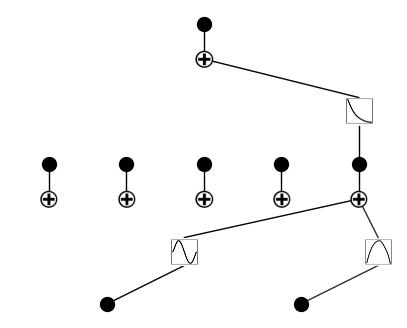

In [2]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=1, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);
model.plot()

### Parameter 1: $\lambda$, overall penalty strength. 

Previously $\lambda=0.01$, now we try different $\lambda$.

$\lambda=0$

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.51e-03 | test_loss: 6.14e-03 | reg: 1.52e+01 | : 100%|█| 20/20 [00:03<00:00,  5.84it


saving model version 0.1


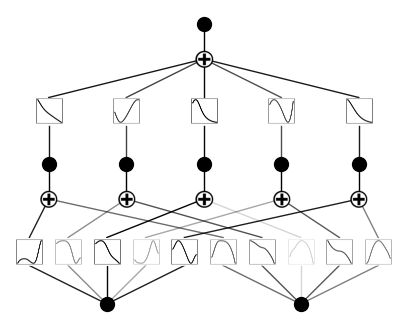

In [3]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=1, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.00);
model.plot()

$\lambda=1$

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.70e+00 | test_loss: 1.73e+00 | reg: 1.08e+01 | : 100%|█| 20/20 [00:04<00:00,  4.59it


saving model version 0.1


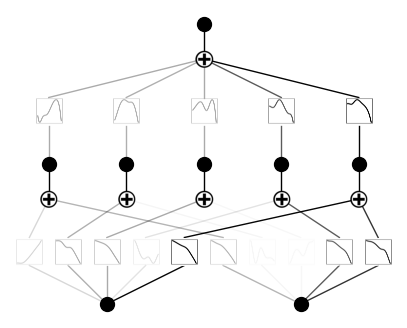

In [4]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=1.0);
model.plot()

### Parameter 2: (relative) penalty strength of entropy $\lambda_{\rm ent}$.

The absolute magnitude is $\lambda\lambda_{\rm ent}$. Previously we set $\lambda=0.1$ and $\lambda_{\rm ent}=2.0$ (default). Below we fix $\lambda=0.1$ and vary $\lambda_{\rm ent}$.

$\lambda_{\rm ent}=0.0$

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.20e-02 | test_loss: 4.50e-02 | reg: 2.57e+00 | : 100%|█| 20/20 [00:04<00:00,  4.68it


saving model version 0.1


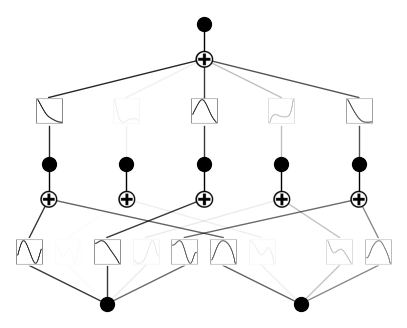

In [5]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=1, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=0.0);
model.plot()

$\lambda_{\rm ent}=10.$

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.83e-02 | test_loss: 7.74e-02 | reg: 1.54e+01 | : 100%|█| 20/20 [00:05<00:00,  3.77it


saving model version 0.1


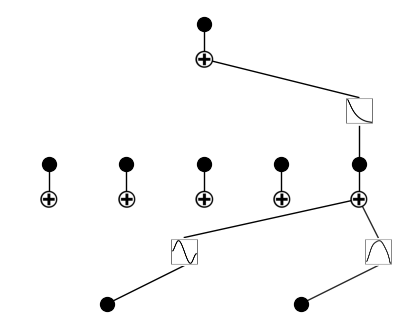

In [6]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=1, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.0);
model.plot()

### Parameter 3: seed. 

Previously we use seed = 1. Below we vary seed.

${\rm seed} = 42$

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.67e-02 | test_loss: 5.72e-02 | reg: 5.81e+00 | : 100%|█| 20/20 [00:04<00:00,  4.81it


saving model version 0.1


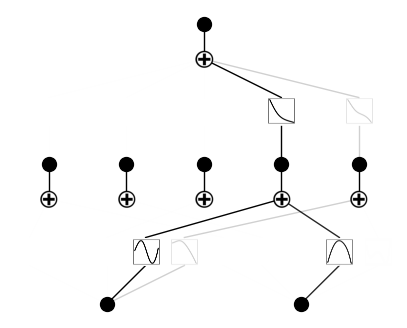

In [7]:
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);
model.plot()